### scrape Amazon reviews:

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('output_usb_c_adapter_reviews.xlsx')

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productTitle  5600 non-null   object
 1   Review Title  5600 non-null   object
 2   Rating        5600 non-null   object
 3   Review Body   5600 non-null   object
dtypes: object(4)
memory usage: 175.1+ KB


(None,
                                         productTitle  \
 0  Apple 20W USB-C Power Adapter (for iPhone, iPa...   
 1  Apple 20W USB-C Power Adapter (for iPhone, iPa...   
 2  Apple 20W USB-C Power Adapter (for iPhone, iPa...   
 3  Apple 20W USB-C Power Adapter (for iPhone, iPa...   
 4  Apple 20W USB-C Power Adapter (for iPhone, iPa...   
 
                                         Review Title              Rating  \
 0              5.0 out of 5 stars\nExcellent Product  5.0 out of 5 stars   
 1                  5.0 out of 5 stars\nGreat product  5.0 out of 5 stars   
 2          4.0 out of 5 stars\nGood and fast charger  4.0 out of 5 stars   
 3                   5.0 out of 5 stars\nOriginal one  5.0 out of 5 stars   
 4  5.0 out of 5 stars\nGood product and great qua...  5.0 out of 5 stars   
 
                                          Review Body  
 0  Amazing product and very well priced with what...  
 1  Good quality, The charger was exactly what I e...  
 2  Quality also 

In [ ]:
df

,productTitle,Review Title,Rating,Review Body
0,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nExcellent Product,5.0 out of 5 stars,Amazing product and very well priced with what...
1,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nGreat product,5.0 out of 5 stars,"Good quality, The charger was exactly what I e..."
2,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",4.0 out of 5 stars\nGood and fast charger,4.0 out of 5 stars,Quality also good working good condition worth...
3,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nOriginal one,5.0 out of 5 stars,The product is original and in good condition
4,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nGood product and great qua...,5.0 out of 5 stars,Looks good and working condition
...,...,...,...,...
5595,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nFast product,5.0 out of 5 stars,Its of from apple and too good for apple batte...
5596,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nReview,5.0 out of 5 stars,This product is best quality . It's appearanc...
5597,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nGood product,5.0 out of 5 stars,Good product
5598,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",4.0 out of 5 stars\nOverall good,4.0 out of 5 stars,The box was folded and it was derty. Chargers ...


In [ ]:
# Step 1: Convert the "Rating" column to a numeric format
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

# Step 2: Explore Rating Distribution
rating_distribution = df['Rating'].value_counts().sort_index()

# Step 3: Word Count Analysis
df['Review Length'] = df['Review Body'].apply(lambda x: len(x.split()))

# Summary statistics for review length
review_length_summary = df['Review Length'].describe()

rating_distribution, review_length_summary

(Rating
 4.0    1680
 5.0    3920
 Name: count, dtype: int64,
 count    5600.000000
 mean       13.200000
 std         9.527655
 min         2.000000
 25%         5.000000
 50%        11.000000
 75%        19.000000
 max        33.000000
 Name: Review Length, dtype: float64)

In [ ]:
from textblob import TextBlob

# Step 1: Text Preprocessing
# Convert the review body to lowercase
df['Cleaned Review Body'] = df['Review Body'].str.lower()

# Step 2: Sentiment Scoring
# Apply sentiment analysis using TextBlob
df['Sentiment Score'] = df['Cleaned Review Body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral based on the score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment Score'].apply(classify_sentiment)

# Step 3: Sentiment Distribution
sentiment_distribution = df['Sentiment'].value_counts()

sentiment_distribution


,count
Sentiment,
Positive,5040
Neutral,560


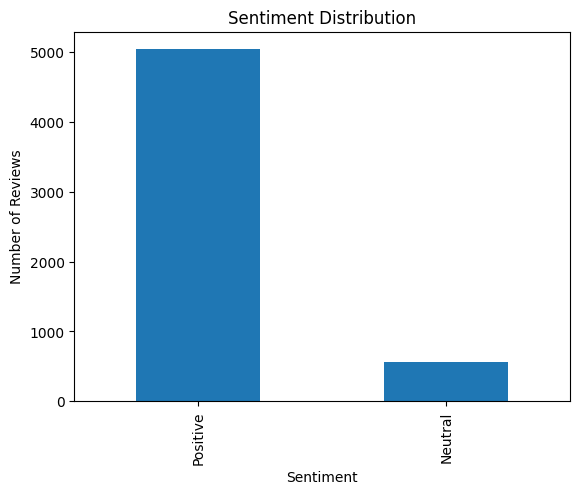

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_distribution.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Filter for positive reviews
positive_reviews = df[df['Sentiment'] == 'Positive']
positive_reviews

,productTitle,Review Title,Rating,Review Body,Review Length,Cleaned Review Body,Sentiment Score,Sentiment
0,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nExcellent Product,5.0,Amazing product and very well priced with what...,19,amazing product and very well priced with what...,0.270000,Positive
1,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nGreat product,5.0,"Good quality, The charger was exactly what I e...",18,"good quality, the charger was exactly what i e...",0.312500,Positive
2,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",4.0 out of 5 stars\nGood and fast charger,4.0,Quality also good working good condition worth...,9,quality also good working good condition worth...,0.566667,Positive
3,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nOriginal one,5.0,The product is original and in good condition,8,the product is original and in good condition,0.537500,Positive
4,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nGood product and great qua...,5.0,Looks good and working condition,5,looks good and working condition,0.700000,Positive
...,...,...,...,...,...,...,...,...
5594,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nGood product and great qua...,5.0,Looks good and working condition,5,looks good and working condition,0.700000,Positive
5595,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nFast product,5.0,Its of from apple and too good for apple batte...,23,its of from apple and too good for apple batte...,0.386667,Positive
5596,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nReview,5.0,This product is best quality . It's appearanc...,33,this product is best quality . it's appearanc...,0.468056,Positive
5597,"Apple 20W USB-C Power Adapter (for iPhone, iPa...",5.0 out of 5 stars\nGood product,5.0,Good product,2,good product,0.700000,Positive


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Combine all positive review text into one string
positive_text = ' '.join(positive_reviews['Cleaned Review Body'])
positive_text

"amazing product and very well priced with what it offers. charges pretty fast and does not heat at all. good quality, the charger was exactly what i expected, and it's comfortable, and it's charging fastthank you amazon🥰 quality also good working good condition worth of value… the product is original and in good condition looks good and working condition its of from apple and too good for apple battery health. must buy orginal to maintain health...20w adaptor is really charging very fast. this product is best quality .  it's appearance is looking as good as original product. easy to handle  . overall value for money . must try this product. buy now totally worth it. good product the box was folded and it was derty. chargers quality is good 👍 amazing product and very well priced with what it offers. charges pretty fast and does not heat at all. good quality, the charger was exactly what i expected, and it's comfortable, and it's charging fastthank you amazon🥰 quality also good working 

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud

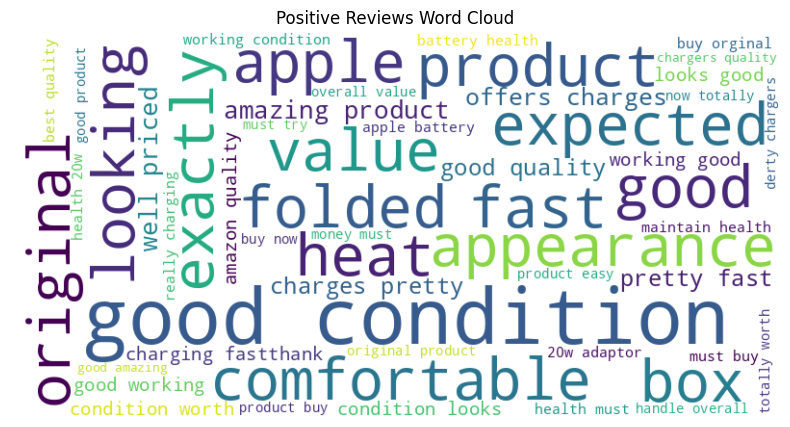

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

### Rating Distribution

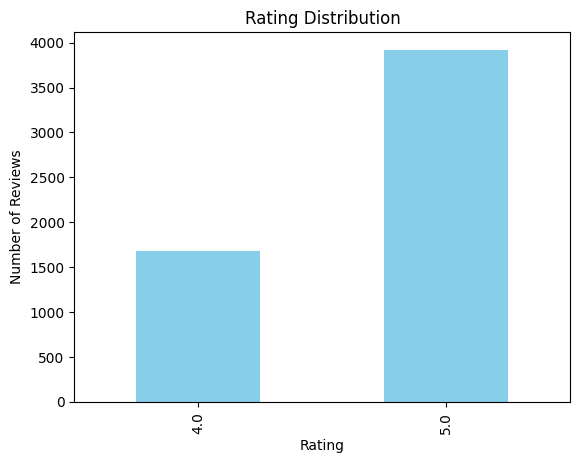

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

### Review Length Distribution

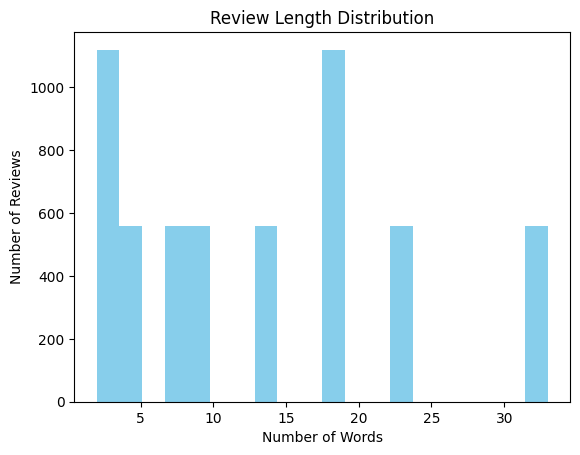

In [ ]:
# Plot the distribution of review lengths
df['Review Length'].plot(kind='hist', bins=20, color='skyblue')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

### Sentiment vs. Rating

### Boxplot:

<ipython-input-13-cc22b60626ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Sentiment Score', data=df, palette='Set3')


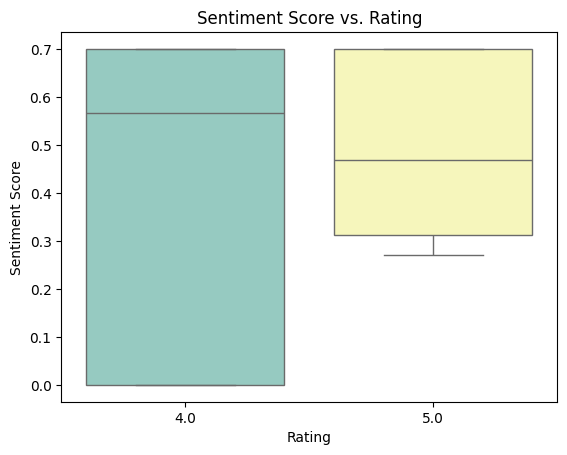

In [ ]:
import seaborn as sns

# Boxplot of sentiment scores vs. ratings
sns.boxplot(x='Rating', y='Sentiment Score', data=df, palette='Set3')
plt.title('Sentiment Score vs. Rating')
plt.show()

### Bar Chart:

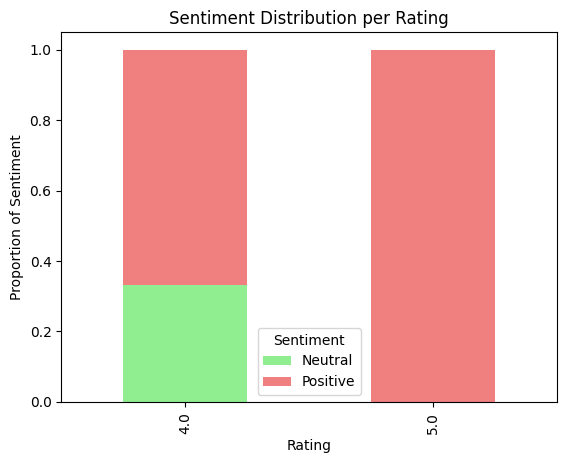

In [ ]:
# Bar chart of sentiment distribution per rating
df.groupby('Rating')['Sentiment'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral', 'gold'])
plt.title('Sentiment Distribution per Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion of Sentiment')
plt.show()


In [ ]:
#  Tokenization

from nltk.tokenize import word_tokenize
import nltk

# Download the required NLTK data (only needed once)
nltk.download('punkt')

# Tokenize the cleaned reviews
df['Tokenized Review'] = df['Cleaned Review Body'].apply(word_tokenize)

# Display the tokenized reviews
print(df[['Cleaned Review Body', 'Tokenized Review']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                 Cleaned Review Body  \
0  amazing product and very well priced with what...   
1  good quality, the charger was exactly what i e...   
2  quality also good working good condition worth...   
3      the product is original and in good condition   
4                   looks good and working condition   

                                    Tokenized Review  
0  [amazing, product, and, very, well, priced, wi...  
1  [good, quality, ,, the, charger, was, exactly,...  
2  [quality, also, good, working, good, condition...  
3  [the, product, is, original, and, in, good, co...  
4             [looks, good, and, working, condition]  


In [ ]:
# Review without stopwords
from nltk.corpus import stopwords

# Download stopwords list (only needed once)
nltk.download('stopwords')

# Define the stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stopwords removal
df['Review Without Stopwords'] = df['Tokenized Review'].apply(remove_stopwords)

# Display reviews after stop words removal
print(df[['Tokenized Review', 'Review Without Stopwords']].head())


                                    Tokenized Review  \
0  [amazing, product, and, very, well, priced, wi...   
1  [good, quality, ,, the, charger, was, exactly,...   
2  [quality, also, good, working, good, condition...   
3  [the, product, is, original, and, in, good, co...   
4             [looks, good, and, working, condition]   

                            Review Without Stopwords  
0  [amazing, product, well, priced, offers, ., ch...  
1  [good, quality, ,, charger, exactly, expected,...  
2  [quality, also, good, working, good, condition...  
3               [product, original, good, condition]  
4                  [looks, good, working, condition]  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Stemming
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to apply stemming
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# Apply stemming to the reviews
df['Stemmed Review'] = df['Review Without Stopwords'].apply(stem_words)

# Display the stemmed reviews
print(df[['Review Without Stopwords', 'Stemmed Review']].head())


                            Review Without Stopwords  \
0  [amazing, product, well, priced, offers, ., ch...   
1  [good, quality, ,, charger, exactly, expected,...   
2  [quality, also, good, working, good, condition...   
3               [product, original, good, condition]   
4                  [looks, good, working, condition]   

                                      Stemmed Review  
0  [amaz, product, well, price, offer, ., charg, ...  
1  [good, qualiti, ,, charger, exactli, expect, ,...  
2  [qualiti, also, good, work, good, condit, wort...  
3                    [product, origin, good, condit]  
4                         [look, good, work, condit]  


In [ ]:
#Sentiment analysis
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(' '.join(text))
    return blob.sentiment.polarity

# Apply sentiment analysis
df['Sentiment Score'] = df['Stemmed Review'].apply(get_sentiment)

# Display the sentiment scores
print(df[['Review Body', 'Sentiment Score']].head())


                                         Review Body  Sentiment Score
0  Amazing product and very well priced with what...         0.200000
1  Good quality, The charger was exactly what I e...         0.700000
2  Quality also good working good condition worth...         0.566667
3      The product is original and in good condition         0.700000
4                   Looks good and working condition         0.700000


In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment
df['Sentiment'] = df['Sentiment Score'].apply(categorize_sentiment)

# Display the final results
print(df[['Review Body', 'Sentiment Score', 'Sentiment']].head())


                                         Review Body  Sentiment Score  \
0  Amazing product and very well priced with what...         0.200000   
1  Good quality, The charger was exactly what I e...         0.700000   
2  Quality also good working good condition worth...         0.566667   
3      The product is original and in good condition         0.700000   
4                   Looks good and working condition         0.700000   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive  


In [ ]:
#Feature engineeering text vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert stemmed reviews into a format suitable for vectorization
df['Joined Review'] = df['Stemmed Review'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)

# Fit and transform the data
X_tfidf = tfidf.fit_transform(df['Joined Review'])

# Convert to a DataFrame for better readability
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


In [ ]:
#Splitting the data

from sklearn.model_selection import train_test_split

# Features are the TF-IDF vectors, target is the 'Sentiment'
X = X_tfidf_df
y = df['Sentiment']

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Logistic Regression Accuracy: 100.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       157
    Positive       1.00      1.00      1.00      1523

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



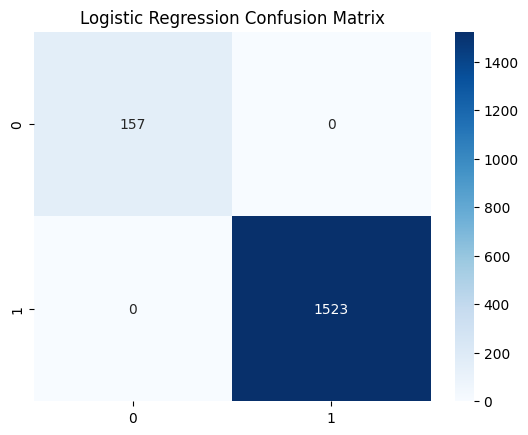

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg) * 100)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Random Forest Accuracy: 100.0
Random Forest Classification Report:
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       157
    Positive       1.00      1.00      1.00      1523

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



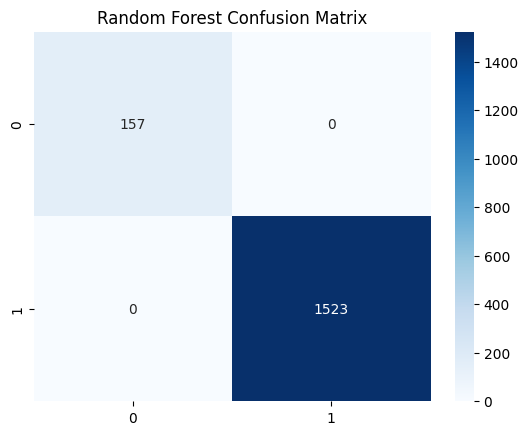

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf) * 100)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


SVM Accuracy: 100.0
SVM Classification Report:
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       157
    Positive       1.00      1.00      1.00      1523

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



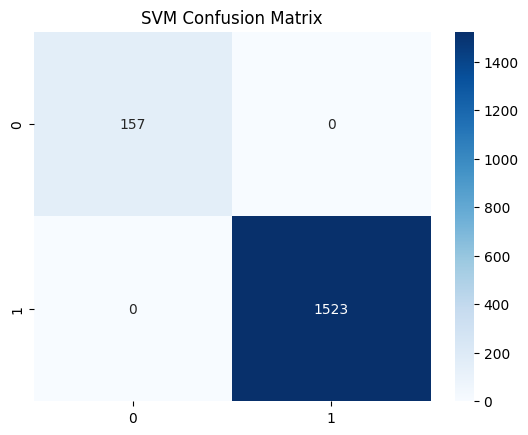

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm) * 100)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()


In [ ]:
import joblib

#saving model
joblib.dump(log_reg, 'log_reg_model.pkl')


['log_reg_model.pkl']

In [ ]:
import nltk

# Print the version of NLTK
print("NLTK version:", nltk.__version__)


NLTK version: 3.8.1
